<a href="https://colab.research.google.com/github/endsonalam/endson-alam-mardhikaa/blob/main/Pemrograman%20Python_Image%20Classification2_Pertemuan%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

daun.jpg  gmb/  pendaki-menikmati-pemandangan-puncak-gunung-slamet.jpg


In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("gmb")
data = []
labels = []

[INFO] loading images...


In [ ]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
	image = np.array(image.resize((168, 168))) / 255.0
	data.append(image)


	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 168, 168, 3)
(146, 168, 168, 3)


In [ ]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model = Sequential()
model.add(Convolution2D(8, (3,3), activation='relu', input_shape=(168,168,3)))
model.add(MaxPool2D(2,2))
model.add(Convolution2D(16, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 166, 166, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 83, 83, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 81, 81, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2560100   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [ ]:
print("[INFO] training network...")
opt = Adam(lr=1e-5, decay=1e-5 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

[INFO] training network...
Epoch 1/30
14/14 [==============================] - 6s 421ms/step - loss: 1.6232 - accuracy: 0.2443 - val_loss: 1.6112 - val_accuracy: 0.2466
Epoch 2/30
14/14 [==============================] - 6s 412ms/step - loss: 1.5753 - accuracy: 0.2603 - val_loss: 1.5828 - val_accuracy: 0.2603
Epoch 3/30
14/14 [==============================] - 6s 412ms/step - loss: 1.5334 - accuracy: 0.3333 - val_loss: 1.5553 - val_accuracy: 0.4178
Epoch 4/30
14/14 [==============================] - 6s 415ms/step - loss: 1.5224 - accuracy: 0.4589 - val_loss: 1.5384 - val_accuracy: 0.3219
Epoch 5/30
14/14 [==============================] - 6s 411ms/step - loss: 1.4814 - accuracy: 0.3836 - val_loss: 1.5219 - val_accuracy: 0.4178
Epoch 6/30
14/14 [==============================] - 6s 411ms/step - loss: 1.4600 - accuracy: 0.4521 - val_loss: 1.4912 - val_accuracy: 0.4247
Epoch 7/30
14/14 [==============================] - 6s 413ms/step - loss: 1.4320 - accuracy: 0.5091 - val_loss: 1.4850 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


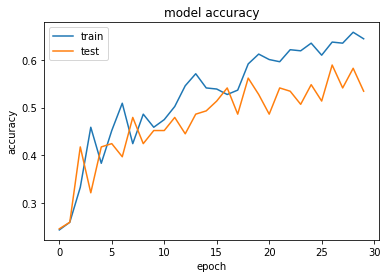

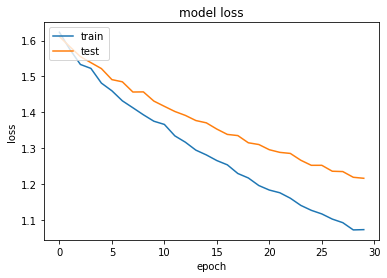

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.70      0.44      0.54        32
      GMB_02       0.39      0.54      0.45        28
      GMB_03       0.60      0.75      0.67        24
      GMB_04       0.45      0.27      0.34        33
      GMB_05       0.58      0.76      0.66        29

    accuracy                           0.53       146
   macro avg       0.54      0.55      0.53       146
weighted avg       0.54      0.53      0.52       146



In [ ]:


model.save('nnmodel_scene')



Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [ ]:
import cv2
import matplotlib.pyplot as plt
image1='daun.jpg'

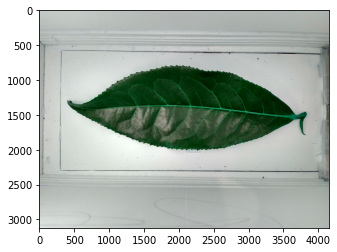

In [ ]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [ ]:
image_testing = Image.open('daun.jpg')
image_testing = np.array(image_testing.resize((168, 168))) / 255.0
image_testing.shape

(168, 168, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 168, 168, 3)


In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.03345544 0.18038662 0.33804864 0.14924416 0.2988651 ]]
['GMB_03']
